## Group tweets

In [8]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../data/interim/twitter_weather_electrical.csv")

In [11]:
df['geometry'] = df['geometry'].apply(wkt.loads)
df = gpd.GeoDataFrame(df).set_crs('EPSG:4326')

In [26]:
df['hour_blocks'] = df['time'].str.split(':').str[0].astype(int)

In [27]:
df

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId,tot_curr_cell,NR_SITES,curr_site
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,0,POINT (11.13000 46.07000),T0129,312,...,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,90.971940,1288.0,0.070630
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,0,POINT (10.83000 46.23000),T0071,905,...,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,1.784586,24.0,0.074358
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,0,POINT (11.46000 46.29000),T0367,958,...,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,0.000000,0.0,0.000000
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,0,POINT (11.04000 45.89000),T0147,203,...,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,47.591226,995.0,0.047830
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,0,POINT (11.12000 46.20000),T0408,204,...,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,0.100372,4.0,0.025093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,0,POINT (11.68000 46.42000),T0096,1205,...,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,0.000000,0.0,0.000000
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13,POINT (11.60000 46.31000),T0389,1000,...,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,0.000000,0.0,0.000000
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,0,POINT (11.30000 46.11000),T0139,925,...,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,0.000000,0.0,0.000000
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,9,POINT (11.30000 46.11000),T0139,925,...,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,0.000000,0.0,0.000000


In [28]:
df_grouped = df.groupby(['date', 'hour_blocks', 'station']).agg({
    'temperature':'mean',
    'precipitation':'mean',
    'timestamp_x': 'count' 
}).rename(columns={'timestamp_x': 'tweet_count'}).reset_index()

In [29]:
df_grouped

,date,hour_blocks,station,temperature,precipitation,tweet_count
0,2013-11-01,0,T0071,8.400,0.0,1
1,2013-11-01,0,T0129,13.000,0.0,2
2,2013-11-01,0,T0147,13.200,0.0,1
3,2013-11-01,0,T0367,8.800,0.0,1
4,2013-11-01,0,T0408,11.650,0.0,4
...,...,...,...,...,...,...
8881,2013-12-31,23,T0408,-2.400,0.0,1
8882,2013-12-31,23,T0409,-4.200,0.0,1
8883,2013-12-31,23,T0437,-8.925,0.0,4
8884,2013-12-31,23,T0450,-9.100,0.0,3


In [79]:
df_selected = df_grouped[(df_grouped['station'] == 'T0129') & (df_grouped['date'] == '2013-12-21')]

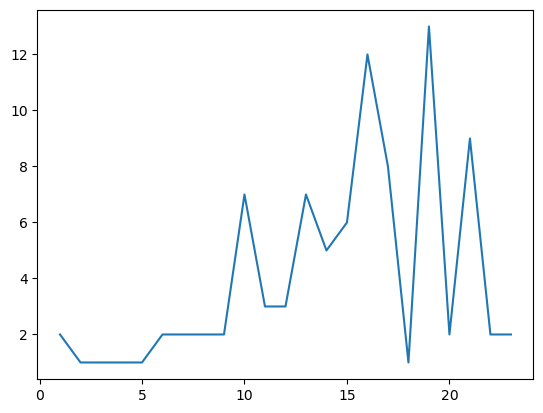

In [80]:
plt.plot(df_selected['hour_blocks'], df_selected['tweet_count'])

Tubiana

08:00 - 19:00

19:00 - 24:00

Noi

00:00 - 08:00

08:00 - 14:00

14:00 - 20:00

20:00 - 23:59

In [83]:
bins = [0, 8, 14, 20, 24]  # 0-8, 8-14, 14-20, 20-24
labels = ['A', 'B', 'C', 'D']

# Create a new column with the categories
df['hour_category'] = pd.cut(df['hour_blocks'], bins=bins, labels=labels, right=False)

In [84]:
df

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,minWind,maxWind,geometry_y,temperature,wind,cellId,tot_curr_cell,NR_SITES,curr_site,hour_category
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,0,POINT (11.13000 46.07000),T0129,312,...,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,90.971940,1288.0,0.070630,A
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,0,POINT (10.83000 46.23000),T0071,905,...,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,1.784586,24.0,0.074358,A
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,0,POINT (11.46000 46.29000),T0367,958,...,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,0.000000,0.0,0.000000,A
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,0,POINT (11.04000 45.89000),T0147,203,...,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,47.591226,995.0,0.047830,A
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,0,POINT (11.12000 46.20000),T0408,204,...,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,0.100372,4.0,0.025093,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,0,POINT (11.68000 46.42000),T0096,1205,...,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,0.000000,0.0,0.000000,A
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13,POINT (11.60000 46.31000),T0389,1000,...,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,0.000000,0.0,0.000000,B
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,0,POINT (11.30000 46.11000),T0139,925,...,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,0.000000,0.0,0.000000,A
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,9,POINT (11.30000 46.11000),T0139,925,...,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,0.000000,0.0,0.000000,B


In [109]:
%pprint

Pretty printing has been turned OFF


In [111]:
#list(df['hour_category'])

In [95]:
df['temperature'].isna().sum()

27

In [102]:
df_cleaned = df.dropna(subset=['temperature', 'precipitation'])
# df_cleaned['precipitation'].isna().sum()

In [115]:
df_cleaned.groupby(['date', 'hour_category', 'station']).size()

/var/folders/96/_x5hcfwd0qd065qkfnngc6bh0000gn/T/ipykernel_25368/4093137817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby(['date', 'hour_category', 'station']).size()


date        hour_category  station
2013-11-01  A              T0032       0
                           T0071       2
                           T0074       0
                           T0096       0
                           T0101       0
                                      ..
2013-12-31  D              T0419       3
                           T0431       0
                           T0437      16
                           T0450       5
                           T0469       8
Length: 7564, dtype: int64

In [116]:
df_grouped2 = df_cleaned.groupby(['date', 'hour_category', 'station']).agg({
    'temperature': lambda x: x.mean(skipna=True),
    'precipitation': lambda x: x.mean(skipna=True),
    'timestamp_x': 'count' 
}).rename(columns={'timestamp_x': 'tweet_count'}).reset_index()

/var/folders/96/_x5hcfwd0qd065qkfnngc6bh0000gn/T/ipykernel_25368/2353088612.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped2 = df_cleaned.groupby(['date', 'hour_category', 'station']).agg({


In [117]:
df_grouped2

,date,hour_category,station,temperature,precipitation,tweet_count
0,2013-11-01,A,T0032,NaN,NaN,0
1,2013-11-01,A,T0071,8.300000,0.0,2
2,2013-11-01,A,T0074,NaN,NaN,0
3,2013-11-01,A,T0096,NaN,NaN,0
4,2013-11-01,A,T0101,NaN,NaN,0
...,...,...,...,...,...,...
7559,2013-12-31,D,T0419,-3.333333,0.0,3
7560,2013-12-31,D,T0431,NaN,NaN,0
7561,2013-12-31,D,T0437,-8.268750,0.0,16
7562,2013-12-31,D,T0450,-8.960000,0.0,5


In [118]:
df_grouped2 = df_grouped2[df_grouped2['tweet_count'] > 0]

In [119]:
df_grouped2

,date,hour_category,station,temperature,precipitation,tweet_count
1,2013-11-01,A,T0071,8.300000,0.0,2
6,2013-11-01,A,T0129,12.642857,0.0,7
10,2013-11-01,A,T0147,12.100000,0.0,2
14,2013-11-01,A,T0236,8.800000,0.0,1
15,2013-11-01,A,T0367,8.800000,0.0,1
...,...,...,...,...,...,...
7557,2013-12-31,D,T0409,-3.289474,0.0,19
7559,2013-12-31,D,T0419,-3.333333,0.0,3
7561,2013-12-31,D,T0437,-8.268750,0.0,16
7562,2013-12-31,D,T0450,-8.960000,0.0,5


<BarContainer object of 45 artists>

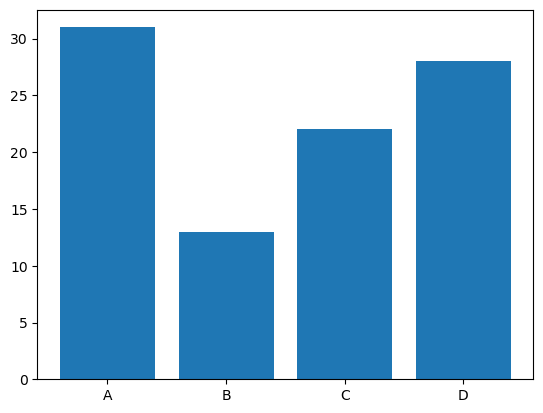

In [148]:
df_selected2 = df_grouped2[(df_grouped2['date'] == '2013-11-19')]
plt.bar(df_selected2['hour_category'], df_selected2['tweet_count'])